Limeng Yang & Rik van Rhee

Jupyter Notebook used for the measurements of our experiment.

In [421]:
# Import statements

import pandas as pd
import matplotlib.pyplot as plt
from lmfit import models
from scipy.signal import find_peaks

First we will use the calibration data to convert the time axis in our data to a frequency axis.

In [422]:
# Open calibration data

df_calib = pd.read_csv('Data 01-12-23/Calibration_Data.csv', header=None, usecols=[3,4,9,10])

#(Rename columns?)


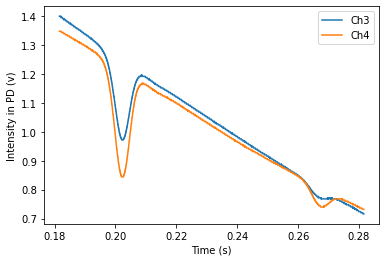

In [423]:
# Show the data in a graph

plt.plot(df_calib[3],df_calib[4], label="Ch3")
plt.plot(df_calib[9],df_calib[10], label="Ch4")
plt.xlabel("Time (s)")
plt.ylabel("Intensity in PD (v)")
plt.legend()

To convert the time axis to frequency, we will fit these curves with a linear fit and two Gaussian fits. From this we can take the found center points of the Gaussian dips and compare the difference in these dips to the known difference in frequency of these. This is $6834.7$ MHz.

In [424]:
# Define the fitfunctions

def LinFunc(x, a, b):
    y = a*x+b
    return y

Lin_model = models.Model(LinFunc)
gauss_model_1 = models.GaussianModel(prefix="A_")
gauss_model_2 = models.GaussianModel(prefix="B_")

tot_model = Lin_model + gauss_model_1 + gauss_model_2

print(f'parameter names: {tot_model.param_names}')
print(f'independent variables: {tot_model.independent_vars}')

parameter names: ['a', 'b', 'A_amplitude', 'A_center', 'A_sigma', 'B_amplitude', 'B_center', 'B_sigma']
independent variables: ['x']


In [425]:
# Set some initial parameters from observation

a = (df_calib[4][0]-df_calib[4][len(df_calib[4])-1])/(df_calib[3][0]-df_calib[3][len(df_calib[3])-1]) 
b = 1.7
A_amp = -0.3
A_center = 0.20
A_sigma = 0.005
B_amp = -0.05
B_center = 0.27
B_sigma = 0.005

In [426]:
# Fit the data with the models
result_1= tot_model.fit(df_calib[4], x=df_calib[3], a=a, b=b, A_amplitude=A_amp, A_center=A_center, A_sigma=A_sigma, B_amplitude=-3.6906e-04, B_center=B_center, B_sigma=B_sigma)
result_2= tot_model.fit(df_calib[10], x=df_calib[9], a=a, b=b, A_amplitude=A_amp, A_center=A_center, A_sigma=A_sigma, B_amplitude=B_amp, B_center=B_center, B_sigma=B_sigma)


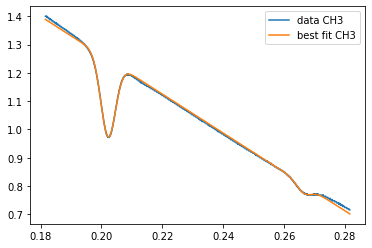

In [427]:
# Plot the first fit
plt.plot(df_calib[3], df_calib[4], label='data CH3')
plt.plot(df_calib[3], result_1.best_fit, '-', label='best fit CH3')
plt.legend()

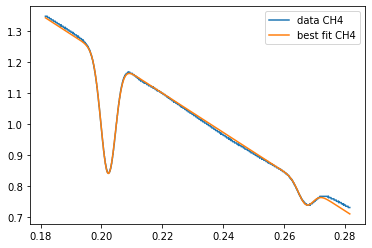

In [428]:
# Plot the second fit
plt.plot(df_calib[9], df_calib[10], label='data CH4')
plt.plot(df_calib[9], result_2.best_fit, '-', label='best fit CH4')
plt.legend()

In [429]:
# Compare the centers of the two fits

A_center_1 = result_1.params.get("A_center").value
A_center_2 = result_2.params.get("A_center").value
B_center_1 = result_1.params.get("B_center").value
B_center_2 = result_2.params.get("B_center").value

print(f"The first peak in the two fits have centers at {A_center_1} and {A_center_2}")
print(f"The second peak in the two fits have centers at {B_center_1} and {B_center_2}")

The first peak in the two fits have centers at 0.202194582795992 and 0.202189933914028
The second peak in the two fits have centers at 0.26644218706949213 and 0.2670902247791182


These centers are close to each other, so we will take the mean

In [430]:
peak_A = (A_center_1+A_center_2)/2
peak_B = (B_center_1+B_center_2)/2

We can thus convert between the time axis and the frequency axis by using:
\begin{equation}
f = \frac{\Delta f}{\Delta t} t.
\end{equation}
We will use $\frac{\Delta f}{\Delta t}=Q$ for notation.


In [431]:
delta_f = 6834.7 #MHz
delta_t = abs(peak_A-peak_B)
Q = delta_f/delta_t

For each dataset we will further use, we can thus convert the time axis to frequency axis.

We will now open each recorded measurement at different currents. We will find the peaks of the $F=3$ lines and calculate the difference. These differences we will add to a list which we will plot against a list of the used currents.

In [432]:
# First the dataset without a current

df_nocur =  pd.read_csv('Data 01-12-23/No_Current_Data.csv', header=None, usecols=[3,4,9,10])

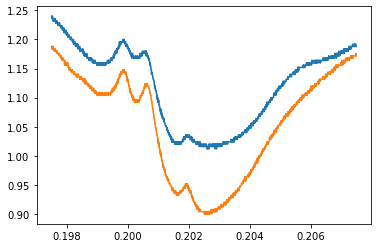

In [433]:
# Plot this data

plt.plot(df_nocur[3], df_nocur[4], label="CH3")
plt.plot(df_nocur[9], df_nocur[10], label="CH4")

[   3  254  589  848 1130 1476 1732 1982 2232 2486]


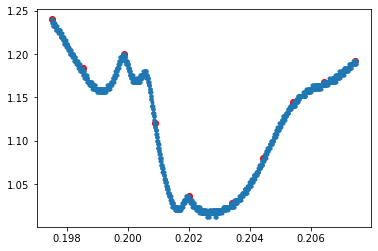

In [434]:

indices, info =find_peaks(df_nocur[4], distance=250)
print(indices)
plt.plot(df_nocur[3], df_nocur[4], ".")
plt.scatter(df_nocur[3][indices], df_nocur[4][indices], color="red")